In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [319]:
# Attempt to read a CSV file with a problematic character in the header
# The character '²' is causing an encoding issue, which is represented as '�'

# Solution 2: If you know the problematic character is '²', you could also try:
data = pd.read_csv('test.csv', encoding='cp1252')

# Solution 3: To clean up the column names after reading:
data.columns = data.columns.str.replace('�', '²')  # Replace the malformed character

In [320]:
data = data.rename(columns={'Land Area (Km�)': 'Land Area (Km²)'})

In [321]:
data.head()  # Display the first few rows of the DataFrame

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [322]:
new_columns = {
    'textID': 'text_id',
    'Time of Tweet': 'time_of_tweet',
    'Age of User': 'age_group',
    'Population -2020': 'population_2020',
    'Land Area (Km²)': 'land_area_km2',
    'Density (P/Km²)': 'density_per_km2'
}
data = data.rename(columns=new_columns)


In [323]:
data.head()  # Display the first few rows of the DataFrame

,text_id,text,sentiment,time_of_tweet,age_group,Country,population_2020,land_area_km2,density_per_km2
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [324]:
data.to_csv('test_updated.csv', index=False, encoding='utf-8')

In [325]:
data = pd.read_csv('test_updated.csv')
data.head(2)  

,text_id,text,sentiment,time_of_tweet,age_group,Country,population_2020,land_area_km2,density_per_km2
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0


In [326]:
data.drop(('text_id'), axis=1, inplace=True)

In [327]:
data.head(2)  # Display the first few rows of the DataFrame

,text,sentiment,time_of_tweet,age_group,Country,population_2020,land_area_km2,density_per_km2
0,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0


In [328]:
rearrange_columns = [
    'text',
    'time_of_tweet',
    'age_group',
    'population_2020',
    'Country',
    'land_area_km2',
    'density_per_km2',
    'sentiment',    
]
data = data[rearrange_columns]

In [329]:
data.head(2)

,text,time_of_tweet,age_group,population_2020,Country,land_area_km2,density_per_km2,sentiment
0,Last session of the day http://twitpic.com/67ezh,morning,0-20,38928346.0,Afghanistan,652860.0,60.0,neutral
1,Shanghai is also really exciting (precisely -...,noon,21-30,2877797.0,Albania,27400.0,105.0,positive


In [330]:
data.duplicated().sum()  # Check for duplicate rows

np.int64(1280)

In [331]:
data.drop_duplicates(inplace=True)  # Remove duplicate rows

In [332]:
data.isnull().sum()  # Check for missing values in the DataFrame

text               1
time_of_tweet      1
age_group          1
population_2020    1
Country            1
land_area_km2      1
density_per_km2    1
sentiment          1
dtype: int64

In [333]:
data = data.dropna()

In [334]:
data.isnull().sum()# Display the first few rows of the cleaned DataFrame

text               0
time_of_tweet      0
age_group          0
population_2020    0
Country            0
land_area_km2      0
density_per_km2    0
sentiment          0
dtype: int64

In [335]:
data.info()  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
Index: 3534 entries, 0 to 3533
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             3534 non-null   object 
 1   time_of_tweet    3534 non-null   object 
 2   age_group        3534 non-null   object 
 3   population_2020  3534 non-null   float64
 4   Country          3534 non-null   object 
 5   land_area_km2    3534 non-null   float64
 6   density_per_km2  3534 non-null   float64
 7   sentiment        3534 non-null   object 
dtypes: float64(3), object(5)
memory usage: 248.5+ KB


In [336]:
data.describe()

,population_2020,land_area_km2,density_per_km2
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [337]:
data.head(1)  # Display the first few rows of the DataFrame

,text,time_of_tweet,age_group,population_2020,Country,land_area_km2,density_per_km2,sentiment
0,Last session of the day http://twitpic.com/67ezh,morning,0-20,38928346.0,Afghanistan,652860.0,60.0,neutral


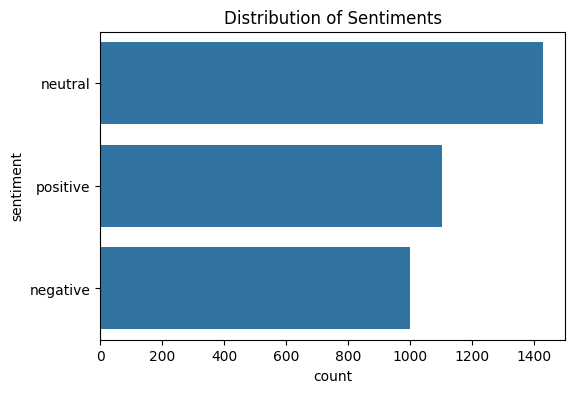

In [338]:
plt.figure(figsize=(6,4))
sns.countplot(y='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.show()

In [339]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [340]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text.strip()



In [341]:
# Step 1: Apply the cleaning function
data['clean_text'] = data['text'].apply(clean_text)

# Step 2: Move 'clean_text' right after 'text'
text_index = data.columns.get_loc("text")
data.insert(text_index + 1, 'clean_text', data.pop('clean_text'))


In [342]:
data.head(2)

,text,clean_text,time_of_tweet,age_group,population_2020,Country,land_area_km2,density_per_km2,sentiment
0,Last session of the day http://twitpic.com/67ezh,last session of the day,morning,0-20,38928346.0,Afghanistan,652860.0,60.0,neutral
1,Shanghai is also really exciting (precisely -...,shanghai is also really exciting precisely sky...,noon,21-30,2877797.0,Albania,27400.0,105.0,positive


In [343]:
df = data.drop(["population_2020", "Country", "land_area_km2", "density_per_km2"], axis=1)


In [344]:
df.head(2)  # Display the first few rows of the DataFrame

,text,clean_text,time_of_tweet,age_group,sentiment
0,Last session of the day http://twitpic.com/67ezh,last session of the day,morning,0-20,neutral
1,Shanghai is also really exciting (precisely -...,shanghai is also really exciting precisely sky...,noon,21-30,positive


In [345]:
x = df.drop('sentiment', axis=1)
y = df['sentiment']

In [346]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) 

In [347]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [348]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

tfidf = TfidfVectorizer(max_features=5000)
ohe = OneHotEncoder(handle_unknown='ignore')




In [349]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('TfidfVectorizer', tfidf, 'clean_text'),
        ('LabelEncoder', ohe, ['age_group','time_of_tweet'])
    ]
    , remainder='drop' , # Keep other columns unchanged
     sparse_threshold=0
)

In [350]:
preprocessor

,transformers,"[('TfidfVectorizer', ...), ('LabelEncoder', ...)]"
,remainder,'drop'
,sparse_threshold,0
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'


In [351]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)

In [352]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

In [353]:
from sklearn.metrics import accuracy_score,classification_report
for model_name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)  # ✅ Correct: use updated prediction
    print(f"\n {model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


 Logistic Regression Accuracy: 0.6421
              precision    recall  f1-score   support

    negative       0.69      0.51      0.59       207
     neutral       0.58      0.73      0.65       286
    positive       0.72      0.65      0.68       214

    accuracy                           0.64       707
   macro avg       0.66      0.63      0.64       707
weighted avg       0.65      0.64      0.64       707


 Random Forest Accuracy: 0.6436
              precision    recall  f1-score   support

    negative       0.70      0.44      0.54       207
     neutral       0.57      0.77      0.65       286
    positive       0.76      0.67      0.71       214

    accuracy                           0.64       707
   macro avg       0.67      0.63      0.64       707
weighted avg       0.66      0.64      0.64       707



In [354]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout



In [355]:
# Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dummy.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
     Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

c:\Users\haris\Desktop\ML\Sentiment Analysis\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [356]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [357]:
history = model.fit(
    X_train_dummy, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2  
)



Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3599 - loss: 1.0974 - val_accuracy: 0.3869 - val_loss: 1.0879
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4384 - loss: 1.0646 - val_accuracy: 0.4399 - val_loss: 1.0528
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5808 - loss: 0.9415 - val_accuracy: 0.5654 - val_loss: 0.9184
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7191 - loss: 0.7109 - val_accuracy: 0.6025 - val_loss: 0.8673
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8519 - loss: 0.4641 - val_accuracy: 0.6166 - val_loss: 0.8991
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9167 - loss: 0.2858 - val_accuracy: 0.5936 - val_loss: 0.9901
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9540 - loss: 0.1669 - val_accuracy: 0.5972 - val_loss: 1.0672
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9722 - loss: 0.1301 - val_accuracy: 0.5972 - val_loss

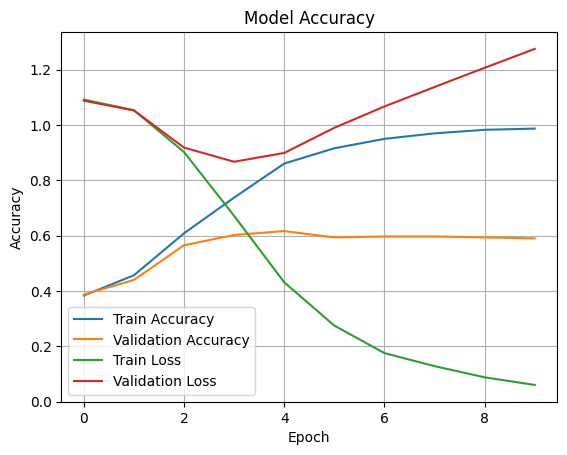

In [358]:

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()




In [359]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_dummy, y_train)
y_pred_rf = rf.predict(X_test_dummy)


In [360]:
print(df.columns)

Index(['text', 'clean_text', 'time_of_tweet', 'age_group', 'sentiment'], dtype='object')


In [361]:
def predict_sentiment(text):
    cleaned_text = clean_text(text)
    
    # Replace with categories that exist in your training data
    input_df = pd.DataFrame({
        'clean_text': [cleaned_text],
        'age_group': ['25-34'],  # Must match a category seen during training
        'time_of_tweet': ['Afternoon']  # Must match a category seen during training
    })
    
    transformed_text = preprocessor.transform(input_df)
    prediction = model.predict(transformed_text)
    return label_encoder.inverse_transform([np.argmax(prediction)])[0]

print(predict_sentiment("I love this product! It's amazing."))  # Example usage
print(predict_sentiment("This is the worst experience I've ever had."))  # Example

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
negative


In [362]:
# pickle library is used to save the model to later use for Api
import pickle
pickle.dump(rf, open('website/RandomForest.pkl', 'wb'))
pickle.dump(preprocessor, open('website/data_preprocessor.pkl', 'wb'))    